"""<br>
    @Author: Shivraj Yelave<br>
    @Date: 08-10-2024<br>
    @Last Modified by: Shivraj Yelave<br>
    @Last Modified time: 08-10-2024<br>
    @Title : Python Program for Hierarchial Clustering task <br>
<br>
"""

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('https://drive.google.com/uc?id=1XVi34snXnh6qW2u71jwc05oCRnpOXoWF',\
                 names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Check for missing values and replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['workclass','education', 'marital-status', 'occupation', 'relationship',
                       'race', 'sex', 'native-country', 'income']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store the encoder for potential inverse transformation




In [7]:
# Define features and target variable
X = df.drop('income', axis=1)  # Features
y = df['income']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
dendograms = df[['age','capital-gain', 'hours-per-week']]

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(dendograms, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [1]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
display(dendograms)

In [ ]:
model = AgglomerativeClustering(n_clusters=3)
dendograms['cluster'] = model.fit_predict(dendograms)

In [23]:
display(dendograms)

,age,capital-gain,hours-per-week,cluster
0,39,2174,40,0
1,50,0,13,0
2,38,0,40,0
3,53,0,40,0
4,28,0,40,0
...,...,...,...,...
32556,27,0,38,0
32557,40,0,40,0
32558,58,0,40,0
32559,22,0,20,0


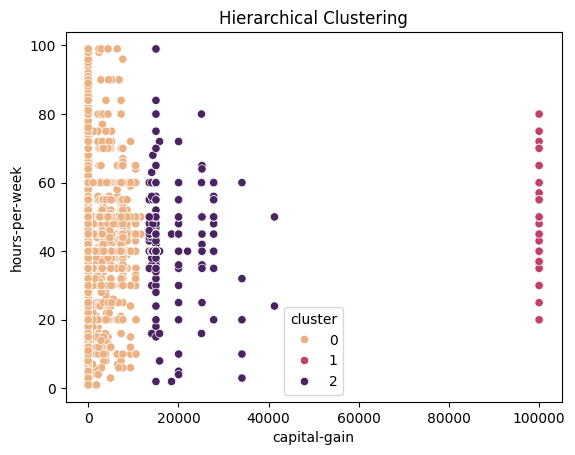

In [31]:
# Plot the clusters
sns.scatterplot(data = dendograms, x = 'capital-gain', y = 'hours-per-week', hue='cluster', palette='flare')
plt.title('Hierarchical Clustering')
plt.show()